In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

### Extração dos dados do CSV para lista de dicionários python
- o arquivo CSV é aberto e iterado ao longo de suas linhas
- A primeira linha é ignorada pois contém somente os nomes das colunas
- Linha a linha, os dados são trasnferido para a lista **clicks**, como dicionários

In [14]:
# Transforma csv em lista de dicionários clicks com cliques do usuário
clicks = []
with open("clicks.csv", 'r') as file:
    # pula primeira linha com nomes das colunas
    next(file)
    for line in file:
        splitLine = line.replace("\n","").split(",")
        clicks.append({"x":int(splitLine[0]), "y":int(splitLine[1]), "scroll":float(splitLine[2])})
display("O usuário deu " + str(len(clicks)) + " cliques na página")   

'O usuário deu 91 cliques na página'

### Preparação para a criação do mapa de calor
A seguir, os dados povoam uma matriz de zeros denominada frame que representa a tela do computador em pixels.
Ela será usada para criação do mapa de calor. Além disso, para a visualização dos dados ficar melhor, é aplicada um filtro
gaussiano em frame para que os dados fiquem mais 'espalhados'.

In [3]:
# clicks = [{'x': 277, 'y': 253}, {'x': 277, 'y': 253}, {'x': 277, 'y': 253}, {'x': 75, 'y': 436}, {'x': 455, 'y': 278}, {'x': 189, 'y': 126}, {'x': 189, 'y': 126}, {'x': 189, 'y': 126}, {'x': 336, 'y': 263}, {'x': 986, 'y': 284}, {'x': 892, 'y': 383}, {'x': 1041, 'y': 313}, {'x': 961, 'y': 395}, {'x': 770, 'y': 436}, {'x': 658, 'y': 385}, {'x': 507, 'y': 440}, {'x': 393, 'y': 365}, {'x': 317, 'y': 336}, {'x': 235, 'y': 245}, {'x': 112, 'y': 206}, {'x': 252, 'y': 189}, {'x': 292, 'y': 376}, {'x': 178, 'y': 517}, {'x': 148, 'y': 619}, {'x': 312, 'y': 724}, {'x': 485, 'y': 585}, {'x': 419, 'y': 667}, {'x': 538, 'y': 668}, {'x': 503, 'y': 609}, {'x': 634, 'y': 663}, {'x': 659, 'y': 605}, {'x': 740, 'y': 688}, {'x': 768, 'y': 519}, {'x': 875, 'y': 457}, {'x': 912, 'y': 395}, {'x': 938, 'y': 380}, {'x': 964, 'y': 363}, {'x': 988, 'y': 344}, {'x': 1011, 'y': 332}, {'x': 1011, 'y': 332}, {'x': 1142, 'y': 311}, {'x': 1169, 'y': 272}, {'x': 1220, 'y': 254}, {'x': 1303, 'y': 200}, {'x': 1327, 'y': 199}, {'x': 1329, 'y': 331}, {'x': 1316, 'y': 420}, {'x': 550, 'y': 288}]
maxX = 0
maxY = 0

# define os máximos X e Y armazenados em clicks para fazer mapa de caor posteriormente
for click in clicks:
    if click["x"] > maxX:
        maxX = click["x"]
    if click["y"] + int(click["scroll"]) > maxY:
        maxY = click["y"] + int(click["scroll"])

# matriz de zeros onde a quantidade de cliques por pixel serão armazenados
frame = np.zeros((maxX,maxY))

# pova a matriz, aplica a transposta e um filtro gaussiano (que vai 'espalhar' os dados) para exibição no heatmap
for click in clicks:
    # print(click['x'], click['y'])
    frame[click['x']-1][click['y']+int(click["scroll"])-1] += 1
frame = frame.transpose()
frame = gaussian_filter(frame, sigma=25)

<Figure size 640x480 with 0 Axes>

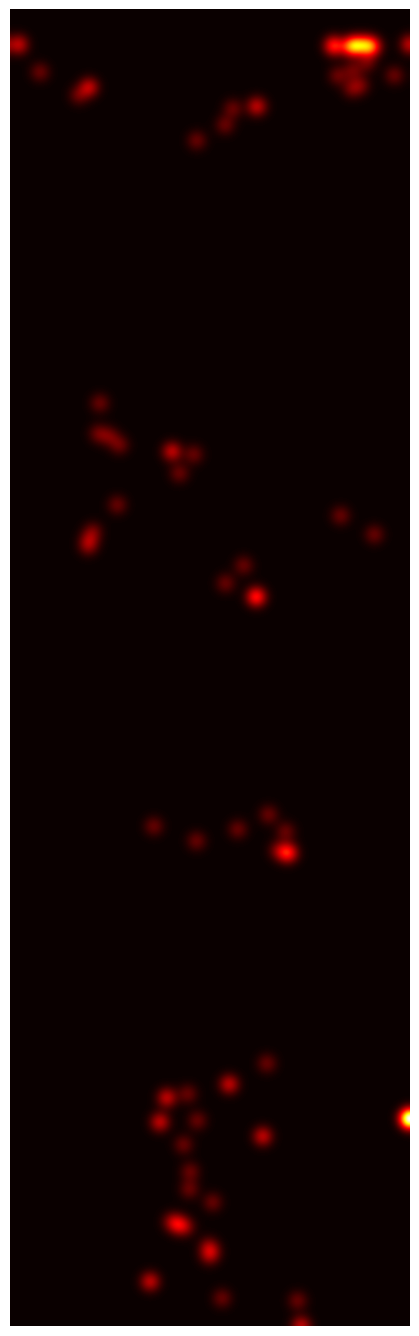

In [4]:
# O heatmap é criado com a função imshow
plt.figure()
plt.subplots(figsize=plt.figaspect(frame))
plt.imshow(frame, cmap='hot', interpolation='kaiser')
# plt.colorbar()

plt.axis("off")
plt.subplots_adjust(0,0,1,1)
# plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.savefig("heatmap.png",bbox_inches='tight')
plt.show()

In [5]:
# Corta as bordas brancas do heatmap criado
from PIL import Image

image = Image.open('heatmap.png')

width, height = image.size
new_width = width - 10
new_height = height - 25

cropped_image = image.crop((10, 25, new_width, new_height))

# Save the cropped image
cropped_image.save('heatmap-cropped.png')


### Mapa de calor dos cliques
Para visualizar os dados, um print da página é sobreposto no mapa de calor,
a fim de mostrar quais foram as áreas mais visadas na sessão de cada usuário

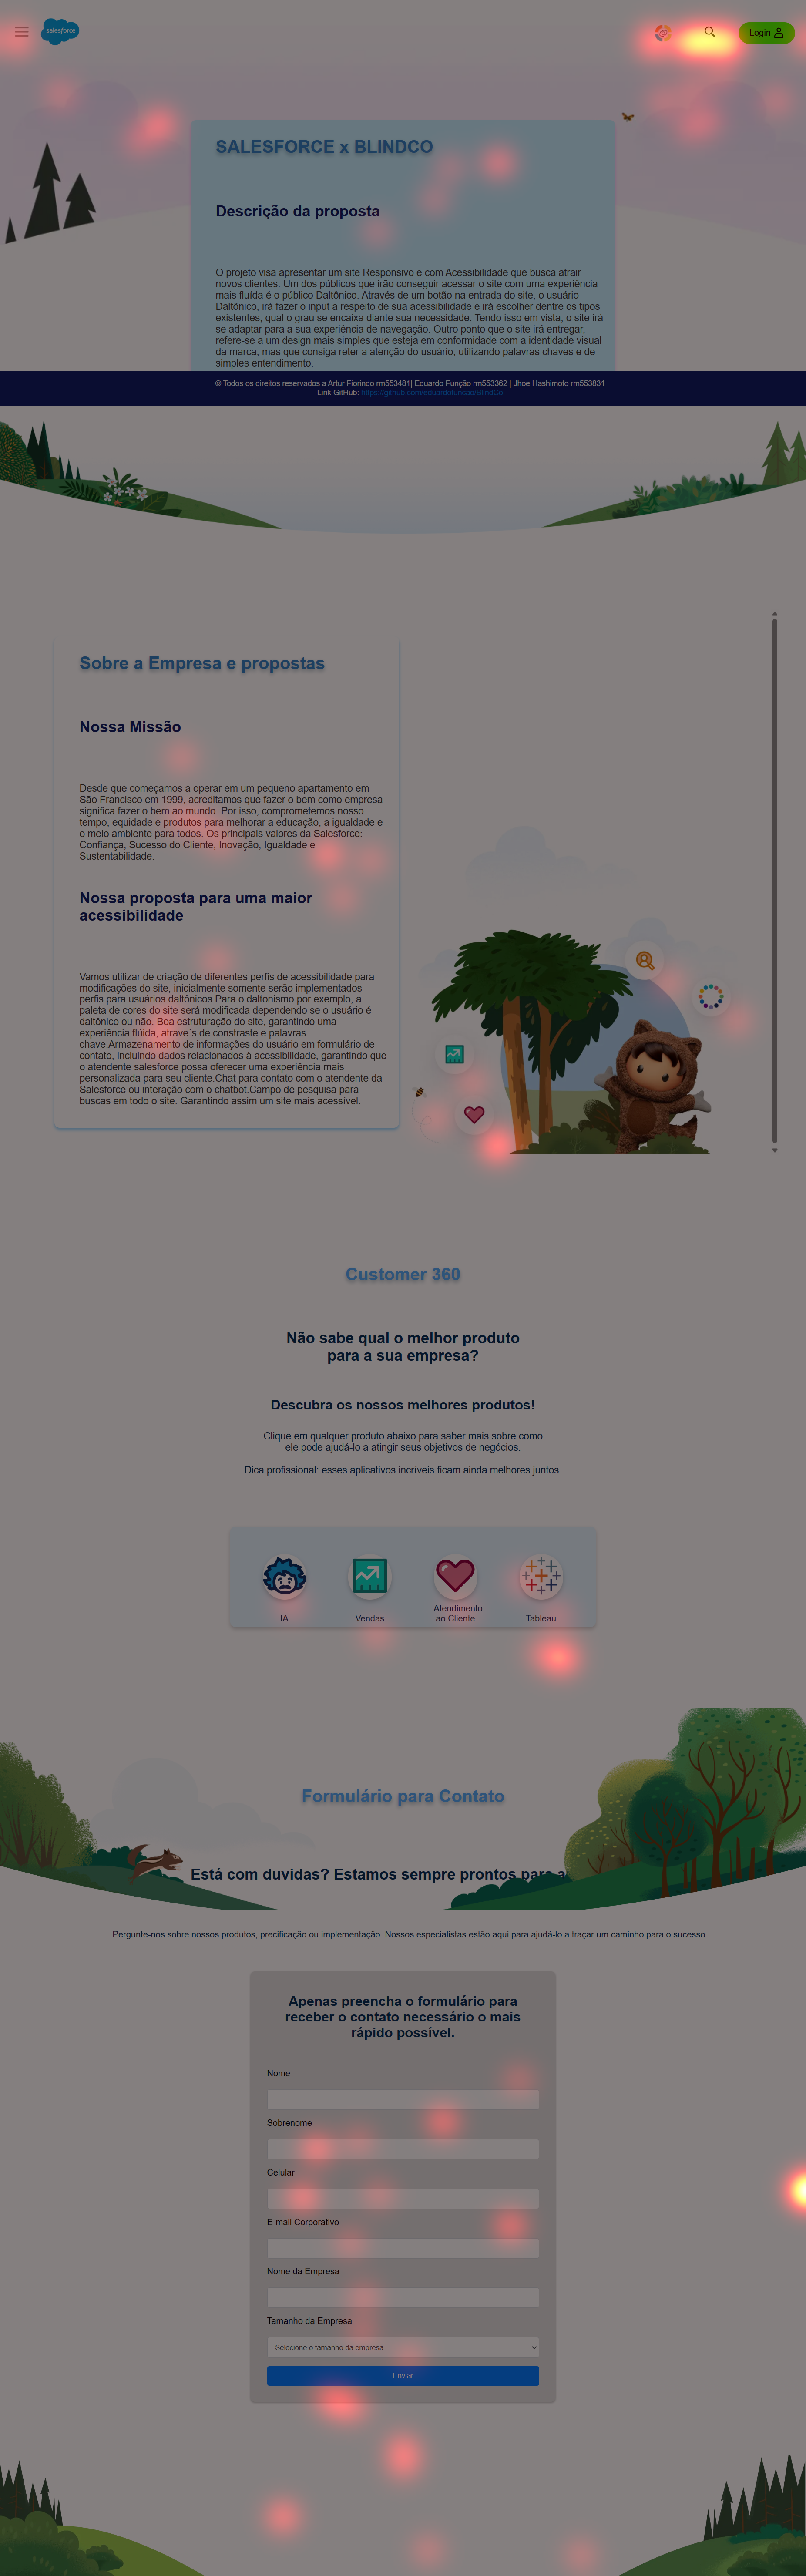

In [6]:
# Sobrepõe as imagens do heatmap e um print da tela do site
from PIL import Image

img1 = Image.open("screen-full.png")
img2 = Image.open("heatmap-cropped.png")

img2 = img2.resize(img1.size)
blended_image = Image.blend(img2, img1, alpha=0.5)
blended_image.save("blended_image.png")
display(blended_image)